In [1]:
import pandas as pd 
import os
from sklearn import preprocessing
import numpy as np
import timeit
import ast 
import networkx as nx

In [2]:
import matplotlib.pyplot as plt

In [3]:
from utils import utils

In [67]:
outcomes = []
with open('./output/bestruns10years_newoutcomes.txt', 'r') as f:
    for line in f:
        currentoutcome = line[:-1]
        outcomes.append(currentoutcome)
outcomes
payoffs = pd.DataFrame.from_dict(ast.literal_eval(outcomes[0]), orient = 'index')

In [68]:
decision_names = payoffs.T.columns

In [74]:
actor_names = ["coalition_appchester", "hydropower_revenue" , "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation" , "environment" , "flood_risk" ,"flood_duration"]

In [57]:
payoffs.columns = actor_names

In [11]:
payoffs[["coalition_appchester", "hydropower_revenue" , "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation"]] = payoffs[["coalition_appchester", "hydropower_revenue" , "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation"]]*-1
payoffs[["environment" , "flood_risk" ,"flood_duration"]] = payoffs[["environment" , "flood_risk" ,"flood_duration"]]*-1

In [46]:
def coalition_method(method_num, payoffs):
    if method_num ==2:
        payoffs['coalition_appchester'] = (payoffs['atomic_power_plant_discharge'] + payoffs['chester_discharge'])/2
        
    return payoffs

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(payoffs)
#x_scaled
normalized_payoffs = pd.DataFrame(x_scaled).reset_index(drop = True)
normalized_payoffs.columns = actor_names
normalized_payoffs.index = column_names 
normalized_payoffs.reset_index(inplace=True)
normalized_payoffs.columns = ['decision'] + actor_names
normalized_payoffs.reset_index(inplace=True)

In [13]:
normalized_payoffs

,index,decision,coalition_appchester,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,recreation,environment,flood_risk,flood_duration
0,0,best_app,0.999940,0.069652,1.000000,0.770506,0.995759,0.875935,0.000000,0.000000,0.000
1,1,best_ch,0.870017,0.885697,0.987419,1.000000,0.955485,0.959965,0.464074,0.402238,0.455
2,2,best_comp,0.590927,1.000000,0.948502,0.696271,0.885966,1.000000,0.669756,0.504977,0.455
3,3,best_dfl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000
4,4,best_env,0.997636,0.519330,0.991074,0.856985,0.998257,0.871975,0.073963,0.365623,0.000
5,5,best_hfl,0.590927,1.000000,0.948502,0.696271,0.885966,1.000000,0.669756,0.504977,0.455
6,6,best_hydro,0.993590,0.967923,0.998937,0.070582,0.986178,0.915970,0.458045,0.412366,0.491
7,7,best_rec,1.000000,0.285917,0.998752,0.991622,1.000000,0.868016,0.198421,0.128530,0.000


In [75]:
desired_actors = actor_names
desired_actors.remove('flood_risk')
desired_actors

['coalition_appchester',
 'hydropower_revenue',
 'atomic_power_plant_discharge',
 'baltimore_discharge',
 'chester_discharge',
 'recreation',
 'environment',
 'flood_duration']

In [93]:
from games import games

In [84]:
game = games(normalized_payoffs, desired_actors)

In [85]:
game.set_parameters()

In [88]:
desired_actors

['coalition_appchester',
 'hydropower_revenue',
 'atomic_power_plant_discharge',
 'baltimore_discharge',
 'chester_discharge',
 'recreation',
 'environment',
 'flood_duration']

In [89]:
graphs = []
#actors = desired_actors
for i in desired_actors:
    graphs.append(preference_direction([i]))
all_outcome = game.preference_direction(desired_actors)

In [90]:
actors = ["Peach Bottom and Chester", "Hydropower Revenue", "Baltimore Discharge", "Recreation" , "Environment", "Flood Duration"]

In [94]:
game.plot_aggregation(graphs, 'resultant', actors, "./visuals/modelv1/NashEquilibrium_Coalition.png")

AttributeError: 'games' object has no attribute 'plot_aggregation'

In [76]:
import plotly.express as px
df = normalized_payoffs
fig = px.parallel_coordinates(df, color= 'index', dimensions = desired_actors)
fig.update_layout(width = 1100, height = 400)
fig.show()

In [58]:
normalized_payoffs.to_csv('./output/normalised_payoffs_all.csv')

In [17]:
strategies = normalized_payoffs.T.drop('index')
strategies.columns = list(strategies.iloc[0])
strategies.drop('decision', inplace=True)
strategies

,best_app,best_ch,best_comp,best_dfl,best_env,best_hfl,best_hydro,best_rec
coalition_appchester,0.99994,0.870017,0.590927,0,0.997636,0.590927,0.99359,1
hydropower_revenue,0.0696522,0.885697,1,0,0.51933,1,0.967923,0.285917
atomic_power_plant_discharge,1,0.987419,0.948502,0,0.991074,0.948502,0.998937,0.998752
baltimore_discharge,0.770506,1,0.696271,0,0.856985,0.696271,0.0705819,0.991622
chester_discharge,0.995759,0.955485,0.885966,0,0.998257,0.885966,0.986178,1
recreation,0.875935,0.959965,1,0,0.871975,1,0.91597,0.868016
environment,0,0.464074,0.669756,1,0.0739632,0.669756,0.458045,0.198421
flood_risk,0,0.402238,0.504977,1,0.365623,0.504977,0.412366,0.12853
flood_duration,0,0.455,0.455,1,0,0.455,0.491,0


In [18]:
adj_matrix = pd.crosstab(strategies.T.index, strategies.T.index).reset_index()
adj_matrix.index = list(adj_matrix['row_0'])
adj_matrix.drop(columns = 'row_0', inplace = True)
for col in adj_matrix.columns:
    adj_matrix[col].values[:] = 0

In [19]:
import matplotlib.pyplot as plt

In [20]:
from matplotlib.pyplot import figure, text

def preference_direction(actor):

    G = nx.DiGraph()

    for index, values in strategies.items():
        G.add_node(index)
        for itemName, itemContent in values.items():
            if itemName == actor:
                G.nodes[index][itemName] = itemContent


    for index0 in strategies.T[actor]:
        for index1 in adj_matrix:
            for index2 in strategies:
                if (strategies[index1][index0] - strategies[index2][index0]) > 0.0:
                    #adj_matrix[index2][index1] = adj_matrix[index2][index1] + 0.5
                    try:
                        G.edges[(index2, index1)]['weight'] = G.edges[(index2, index1)]['weight'] + 0.5
                    except:
                        G.add_edge(index2, index1, weight=0.5)
                if (strategies[index1][index0] - strategies[index2][index0]) < 0.0:
                    try:
                        G.edges[(index1, index2)]['weight'] = G.edges[(index1, index2)]['weight'] + 0.5
                    except:
                        G.add_edge(index1, index2, weight=0.5)
                    #adj_matrix[index1][index2] = adj_matrix[index1][index2] + 0.5

    edge_labels=dict([((u,v,),d['weight'])
                    for u,v,d in G.edges(data=True)])
    

    for node in G.nodes():
        node_in_weight = 0
        node_out_weight = 0
        for i in G.in_edges(node):
            node_in_weight += G.edges[i]['weight']
        for i in G.out_edges(node):
            node_out_weight += G.edges[i]['weight']
        G.nodes[node]['resultant'] = node_in_weight - node_out_weight
        G.nodes[node]['in_arrows'] = node_in_weight
        G.nodes[node]['out_arrows'] = node_out_weight

    return G   
    

In [21]:
graphs = []
actors = ["coalition_appchester", "hydropower_revenue", "baltimore_discharge", "recreation" , "environment", "flood_duration"]
for i in actors:
    graphs.append(preference_direction([i]))
all_outcome = preference_direction(actors)

In [64]:
import networkx as nx
longest_path = nx.dag_longest_path(graphs[1])
len(longest_path)

7

In [29]:
# longest_path = nx.dag_longest_path(graphs[0])
# edges = []
# for edge in G.edges():
#     for i in range(len(longest_path)-1):
#         if edge[0] == longest_path[i] and edge[1] == longest_path[i+1]:
#             edges.append(edge)

# positions = {'best_app': ([-1.75614059,  0.95877703]), 'best_ch': ([ 1.76382629, -0.93953805]), 'best_comp': ([ 0.00053183, -0.02857178]), 'best_dfl': ([-0.05271803,  1.99630007]), 'best_env': ([1.69867552, 1.05730124]), 'best_hydro': ([ 0.06409619, -2.        ]), 'best_rec': ([-1.71827121, -1.0442685 ])}

positions = {'best_app': ([-0.57368514,  1.29224075]), 'best_ch': ([-0.73785789, -0.1574678 ]), 'best_comp': ([-2.        ,  0.26808907]), 'best_dfl': ([0.66117187, 0.1130347 ]), 'best_env': ([0.70991588, 1.34538909]), 'best_hfl': ([ 1.99370153, -0.21530045]), 'best_hydro': ([-0.66858356, -1.37803322]), 'best_rec': ([ 0.6153373 , -1.26795214])}
fixed_nodes = positions.keys()

In [77]:
actors = ["Peach Bottom and Chester", "Hydropower Revenue", "Baltimore Discharge", "Recreation" , "Environment", "Flood Duration"]

In [79]:
import matplotlib.pyplot as plt

def plot_aggregation(graphs, criteria, actors, output_path):
    fig, axes = plt.subplots(2,3, figsize = (20,10))
    actors = actors

    for i in range(len(graphs)):

        actor = actors[i]
        
        ax = axes.flatten()
        ax1 = ax[i]
  
        G = graphs[i]

        highest_preference = max([G.nodes[n][criteria] 
                                for n in G.nodes()]) 

        lowest_preference = min([G.nodes[n][criteria] 
                                for n in G.nodes()]) 

        labeldict = {}
        node_colors = []
        node_alpha = []
        for node in G.nodes():
            #labeldict[node] = node #+ ' ' + str(int(G.nodes[node]['resultant']))
            if G.nodes[node][criteria] == highest_preference:
                node_colors.append("darkgreen")
                node_alpha.append(1)
            elif G.nodes[node][criteria] == lowest_preference:
                node_colors.append("darkred")
                node_alpha.append(1)
            else:
                node_colors.append("darkblue")
                node_alpha.append(0.8)

        pos = nx.spring_layout(G, k = 0.5, weight = 0, scale = 2, pos = positions, fixed = fixed_nodes )
        #print(pos)
    

        longest_path = nx.dag_longest_path(G)

        longest_edges = []
        edge_colors = []
        edge_alpha = []

        for edge in G.edges():
            for i in range(len(longest_path)-1):
                if edge[0] == longest_path[i] and edge[1] == longest_path[i+1]:
                    longest_edges.append(edge)
                    #edge_colors.append("red")
                #else:
                   # edge_colors.append("grey")
        
        #print(longest_edges)
        
        for edge in G.edges():
            if edge in longest_edges:
                edge_colors.append("darkred")
                edge_alpha.append(1)
            else:
                edge_colors.append("grey")
                edge_alpha.append(0.4)
        


        nx.draw_networkx_nodes(G, pos,  node_size = 200, node_color = node_colors, alpha = node_alpha, ax = ax1)

        # for node, (x, y) in pos.items():
        #     if G.nodes[node]['resultant'] == highest_preference:
        #         text(x, y,' '+ node + ' ', ha='left', va='bottom', fontsize = 11, fontname = "Georgia")

        for node in G.nodes():
            # if G.nodes[node]['resultant'] == highest_preference or G.nodes[node]['resultant'] == lowest_preference:
            labeldict[node] = node

        nx.draw_networkx_labels(G, pos, labels = labeldict, ax = ax1
        , horizontalalignment = 'center'
        ,verticalalignment = 'bottom',
        font_family = 'Georgia' )

        #print(len(edge_colors))
        #print(len(edge_alpha))

        edge_colors = np.array(edge_colors, dtype = "object")
        edge_alpha = np.array(edge_alpha, dtype = "object")

        nx.draw_networkx_edges(G, pos , arrows=True, 
            arrowsize=12,
            edge_color= edge_colors, #"grey",
            #alpha = edge_alpha, #0.8,
            #edge_cmap=plt.cm.Blues,
            width=2,
            ax = ax1)


        #nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
        #nx.draw_networkx_edges(G, pos,  arrows=False)

        ax = plt.gca()
        ax.set_axis_off()
        ax1.set_title(actor, font = 'Georgia', fontsize = 13)
        ax1.axis('off')
        #ax.title(actor)

    plt.savefig(output_path, format = "PNG")
    plt.show(block = False)

In [78]:
percentage_of_total = strategies
total_utility = 0
for i in percentage_of_total:
    total_utility = sum(percentage_of_total[i])
    #print(total_utility)
    percentage_of_total
    for j in range(len(percentage_of_total[i])):
        #print(percentage_of_total[i][j])
        percentage_of_total[i][j] = percentage_of_total[i][j]/total_utility
    # print(percentage_of_total[i][0])
    # print(sum(percentage_of_total[i]))
#percentage_of_total

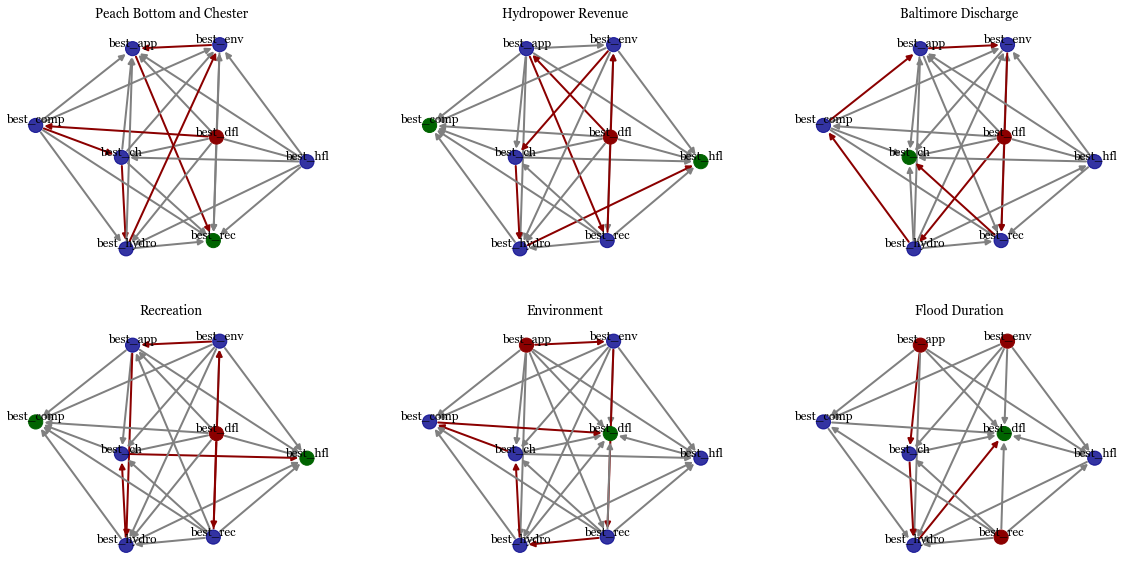

In [80]:
plot_aggregation(graphs, 'resultant', actors, "./visuals/modelv1/NashEquilibrium_Coalition.png")

In [26]:
def combined_graph(all_outcome, criteria):
    edge_colors = "grey"
    G = all_outcome

    highest_preference = max([G.nodes[n][criteria] 
                            for n in G.nodes()]) 
    labeldict = {}
    node_colors = []
    node_alpha = []

    for node in G.nodes():
        #labeldict[node] = node #+ ' ' + str(int(G.nodes[node]['resultant']))
        if G.nodes[node][criteria] == highest_preference:
            node_colors.append("darkgreen")
            node_alpha.append(1)
        else:
            node_colors.append("darkblue")
            node_alpha.append(0.8)

    pos = nx.spring_layout(G, k = 0.5, weight = 0, scale = 2)
    print(pos)

    nx.draw_networkx_nodes(G, pos,  node_size = 200, node_color = node_colors, alpha = node_alpha)

    # for node, (x, y) in pos.items():
    #     if G.nodes[node]['resultant'] == highest_preference:
    #         text(x, y,' '+ node + ' ', ha='left', va='bottom', fontsize = 11, fontname = "Georgia")

    for node in G.nodes():
        #if G.nodes[node]['resultant'] == highest_preference:
        labeldict[node] = node #+ ' ' + str(int(G.nodes[node]['in_arrows'])) + ' ' + str(int(G.nodes[node]['out_arrows']))

    nx.draw_networkx_labels(G, pos, labels = labeldict
    , horizontalalignment = 'center'
    ,verticalalignment = 'bottom',
    font_family = 'Georgia' )

    nx.draw_networkx_edges(G, pos , arrows=True, 
        arrowsize=10,
        edge_color=edge_colors,
        alpha = 0.2,
        #edge_cmap=plt.cm.Blues,
        width=2)


    #nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    #nx.draw_networkx_edges(G, pos,  arrows=False)

    ax = plt.gca()
    ax.set_axis_off()
    #ax.set_title(actor, font = 'Georgia', fontsize = 12)
    ax.axis('off')
    
    plt.savefig("./visuals/modelv1/FallBackBargaining_coalition.png", format = "PNG")
    plt.show(block = False)
#ax.title(actor)

{'best_app': array([ 1.24219075, -1.43640975]), 'best_ch': array([-1.60341207, -1.01598393]), 'best_comp': array([-1.94005697,  0.6037397 ]), 'best_dfl': array([1.22771945, 1.44844449]), 'best_env': array([-0.21123754,  0.24019126]), 'best_hfl': array([-0.32678324,  2.        ]), 'best_hydro': array([-0.2562497 , -1.83370364]), 'best_rec': array([ 1.86782933, -0.00627814])}


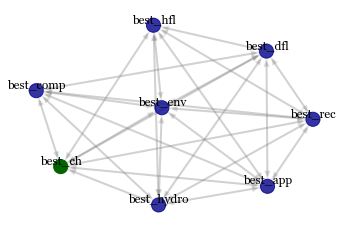

In [27]:
combined_graph('resultant')

In [32]:
payoffs

,coalition_appchester,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,recreation,environment,flood_risk,flood_duration
best_app,0.626150,28.159737,0.675786,0.450311,0.602478,0.711071,-0.156733,-0.668486,-1.666667
best_ch,0.545753,39.008561,0.667526,0.581637,0.578488,0.779286,-0.083998,-0.399596,-0.908333
best_comp,0.373050,40.528147,0.641976,0.407831,0.537078,0.811786,-0.051760,-0.330916,-0.908333
best_dfl,0.007381,27.233753,0.019249,0.009397,0.009331,-0.000000,-0.000000,-0.000000,-0.000000
best_env,0.624724,34.137925,0.669926,0.499798,0.603966,0.707857,-0.145141,-0.424072,-1.666667
best_hfl,0.373050,40.528147,0.641976,0.407831,0.537078,0.811786,-0.051760,-0.330916,-0.908333
best_hydro,0.622220,40.101700,0.675089,0.049786,0.596771,0.743571,-0.084942,-0.392825,-0.848333
best_rec,0.626187,31.034846,0.674967,0.576842,0.605005,0.704643,-0.125634,-0.582565,-1.666667


In [39]:
payoffs.drop(['best_hfl'], inplace = True)

In [42]:
payoffs[['coalition_appchester', 'chester_discharge', 'atomic_power_plant_discharge']]

,coalition_appchester,chester_discharge,atomic_power_plant_discharge
best_app,0.626150,0.602478,0.675786
best_ch,0.545753,0.578488,0.667526
best_comp,0.373050,0.537078,0.641976
best_dfl,0.007381,0.009331,0.019249
best_env,0.624724,0.603966,0.669926
best_hydro,0.622220,0.596771,0.675089
best_rec,0.626187,0.605005,0.674967


best_app      0.639132
best_ch       0.623007
best_comp     0.589527
best_dfl      0.014290
best_env      0.636946
best_hydro    0.635930
best_rec      0.639986
dtype: float64

In [40]:
ranks = payoffs.copy()
for i in payoffs.columns:
    ranks[i] = payoffs[i].rank(ascending = False)

ranks['combined'] = ranks[["coalition_appchester", 'hydropower_revenue', 
       'baltimore_discharge', 'recreation', 'environment', 'flood_duration']].sum(axis=1)
    
ranks[["coalition_appchester", "chester_discharge", "atomic_power_plant_discharge", 'hydropower_revenue', 
       'baltimore_discharge', 'recreation', 'environment', 'flood_duration', 'combined']]

,coalition_appchester,chester_discharge,atomic_power_plant_discharge,hydropower_revenue,baltimore_discharge,recreation,environment,flood_duration,combined
best_app,2.0,3.0,1.0,6.0,4.0,4.0,7.0,6.0,29.0
best_ch,5.0,5.0,5.0,3.0,1.0,2.0,3.0,3.5,17.5
best_comp,6.0,6.0,6.0,1.0,5.0,1.0,2.0,3.5,18.5
best_dfl,7.0,7.0,7.0,7.0,7.0,7.0,1.0,1.0,30.0
best_env,3.0,2.0,4.0,4.0,3.0,5.0,6.0,6.0,27.0
best_hydro,4.0,4.0,2.0,2.0,6.0,3.0,4.0,2.0,21.0
best_rec,1.0,1.0,3.0,5.0,2.0,6.0,5.0,6.0,25.0
